In [4]:
#loading and mdisplaying Dataset
import pandas as pd
customers = pd.read_csv('Customers.csv')
transactions = pd.read_csv('Transactions.csv')
products = pd.read_csv('Products.csv')


transactions.head(), products.head(), customers.head()


(  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
 0        T00001      C0199      P067  2024-08-25 12:38:23         1   
 1        T00112      C0146      P067  2024-05-27 22:23:54         1   
 2        T00166      C0127      P067  2024-04-25 07:38:55         1   
 3        T00272      C0087      P067  2024-03-26 22:55:37         2   
 4        T00363      C0070      P067  2024-03-21 15:10:10         3   
 
    TotalValue   Price  
 0      300.68  300.68  
 1      300.68  300.68  
 2      300.68  300.68  
 3      601.36  300.68  
 4      902.04  300.68  ,
   ProductID              ProductName     Category   Price
 0      P001     ActiveWear Biography        Books  169.30
 1      P002    ActiveWear Smartwatch  Electronics  346.30
 2      P003  ComfortLiving Biography        Books   44.12
 3      P004            BookWorld Rug   Home Decor   95.69
 4      P005          TechPro T-Shirt     Clothing  429.31,
   CustomerID        CustomerName         Region  SignupDate

In [5]:
# Merge transactions
transactions_products = pd.merge(transactions, products, on="ProductID", how="left")

# Merge  customer details
full_data = pd.merge(transactions_products, customers, on="CustomerID", how="left")

full_data.head()


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15


In [6]:
# Analyze categories
category_sales = full_data.groupby('Category')['Quantity'].sum().sort_values(ascending=False)

#highest-demand products in each location
location_product_demand = full_data.groupby(['Region', 'ProductName'])['Quantity'].sum().reset_index()
highest_demand_products = location_product_demand.loc[
    location_product_demand.groupby('Region')['Quantity'].idxmax()
]

#locations with maximum customer spending
location_spending = full_data.groupby('Region')['TotalValue'].sum().sort_values(ascending=False)

# Analyze the continent with maximum customers
continent_customer_count = customers['Region'].value_counts()

# Analyze the most famous brands for all products
full_data['Brand'] = full_data['ProductName'].str.split().str[0] 
brand_popularity = full_data.groupby('Brand')['Quantity'].sum().sort_values(ascending=False)

# Extract top 5 for each category
top_categories = category_sales.head(5)
top_brands = brand_popularity.head(5)
top_spending_locations = location_spending.head(5)

# Display results
category_sales, highest_demand_products, location_spending, continent_customer_count, brand_popularity


(Category
 Books          681
 Home Decor     639
 Electronics    627
 Clothing       590
 Name: Quantity, dtype: int64,
             Region            ProductName  Quantity
 39            Asia      HomeSense T-Shirt        28
 67          Europe         ActiveWear Rug        30
 170  North America   SoundWave Headphones        37
 196  South America  ActiveWear Smartwatch        38,
 Region
 South America    219352.56
 Europe           166254.63
 North America    152313.40
 Asia             152074.97
 Name: TotalValue, dtype: float64,
 Region
 South America    59
 Europe           50
 North America    46
 Asia             45
 Name: count, dtype: int64,
 Brand
 ActiveWear       604
 SoundWave        544
 TechPro          394
 HomeSense        393
 BookWorld        314
 ComfortLiving    288
 Name: Quantity, dtype: int64)

Matplotlib is building the font cache; this may take a moment.


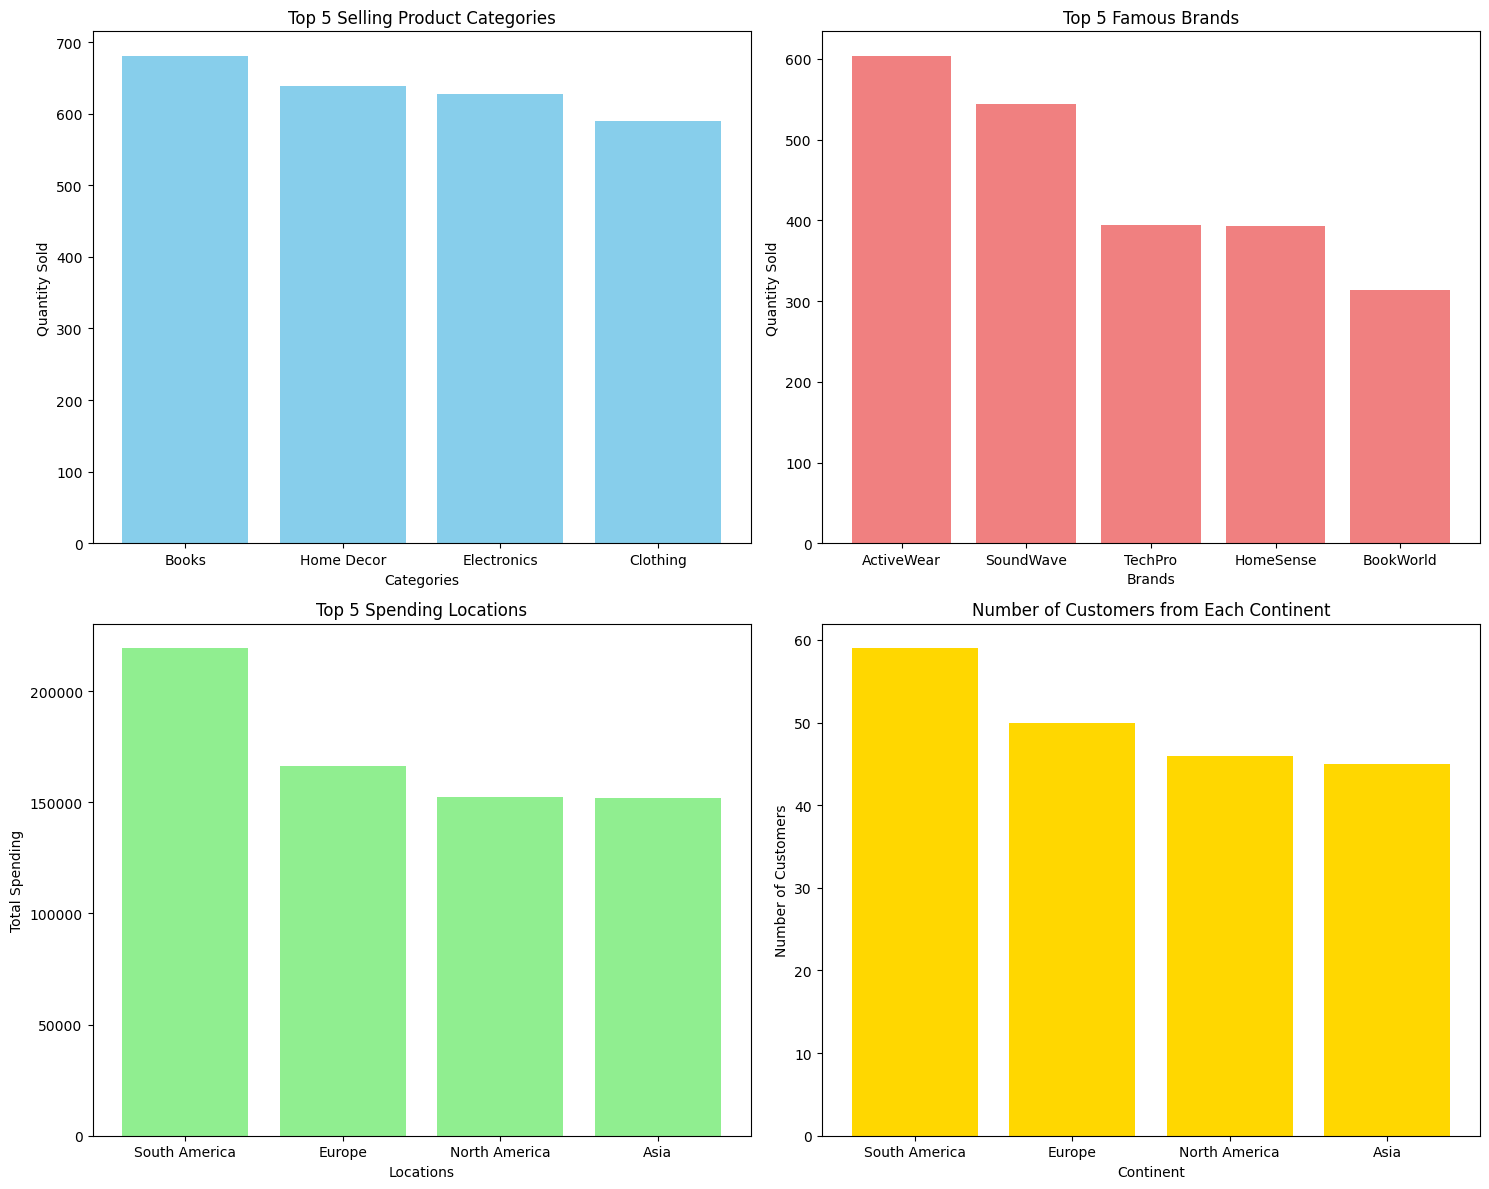

In [7]:
# Plot bar graphs for the top 5 of each category
import matplotlib.pyplot as plt
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.flatten()

# Top categories
axes[0].bar(top_categories.index, top_categories.values, color='skyblue')
axes[0].set_title("Top 5 Selling Product Categories")
axes[0].set_ylabel("Quantity Sold")
axes[0].set_xlabel("Categories")

# Top brands
axes[1].bar(top_brands.index, top_brands.values, color='lightcoral')
axes[1].set_title("Top 5 Famous Brands")
axes[1].set_ylabel("Quantity Sold")
axes[1].set_xlabel("Brands")

# Top spending locations
axes[2].bar(top_spending_locations.index, top_spending_locations.values, color='lightgreen')
axes[2].set_title("Top 5 Spending Locations")
axes[2].set_ylabel("Total Spending")
axes[2].set_xlabel("Locations")

# Number of customers by continent
axes[3].bar(continent_customer_count.index, continent_customer_count.values, color='gold')
axes[3].set_title("Number of Customers from Each Continent")
axes[3].set_ylabel("Number of Customers")
axes[3].set_xlabel("Continent")

# Adjust layout and show plots
plt.tight_layout()
plt.show()
